In [2]:
import jax.numpy as np
from jax import random
import matplotlib.pyplot as plt

def sigmoid(X):
    return 1./(1 + np.exp(-X))

def add_bias(X):
    return np.concatenate([np.ones((X.shape[0],1)), X], axis=1)


jax_key = random.PRNGKey(0)

def one_layer_init(input_size, output_size):
    return random.uniform(key=jax_key, shape=(output_size, input_size + 1), minval=-3, maxval=3)

def compute_layer(A_j, Theta_j):
    z = np.dot(A_j, Theta_j.T)
    return sigmoid(z)

def n_layer_init(layer_sizes):
    weights = []
    for l_idx in range(len(layer_sizes)-1):
        weights.append( one_layer_init(input_size=layer_sizes[l_idx], output_size=layer_sizes[l_idx+1]) )
    return weights

def forward_prop(X, Thetas):
    A0 = add_bias(X)
    outputs = [A0]
    for theta in Thetas[:-1]:
        A = compute_layer(outputs[-1], theta)
        outputs.append( add_bias(A) )
    return outputs + [compute_layer(outputs[-1], Thetas[-1])]

def output_delta(A_j, Y):
    return A_j - Y

def weight_update(A_j, Delta_next, Theta_j, rate):
    return Theta_j - rate * np.dot(Delta_next.T, A_j)

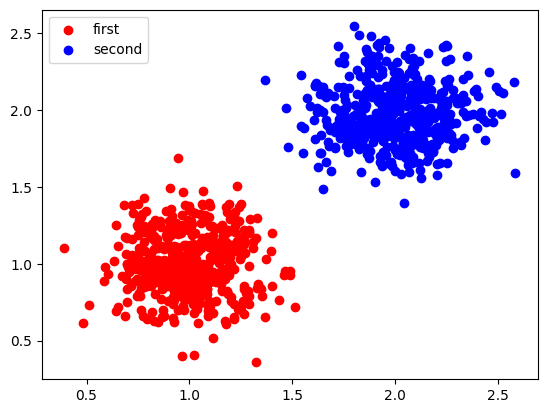

In [3]:
import numpy as np
scale = 0.2

start = 1

amount = 500



data = np.concatenate((
np.hstack((
    np.vstack(np.random.normal(start, scale, amount)),
    np.vstack(np.random.normal(start, scale, amount))
    )),
np.hstack((
    np.vstack(np.random.normal(start+1, scale, amount)),
    np.vstack(np.random.normal(start+1, scale, amount))
    ))
    ))



plt.scatter(np.random.normal(start, scale, amount) ,np.random.normal(start, scale, amount),color="r",label="first")


plt.scatter(np.random.normal(start+1, scale, amount) ,np.random.normal(start+1, scale, amount),color="b",label="second")
plt.legend()

labels= np.hstack(([0]*amount,[1]*amount))

C:\Users\Rex\AppData\Local\Temp\ipykernel_8472\3190153353.py:6: RuntimeWarning: overflow encountered in exp
  return 1./(1 + np.exp(-X))


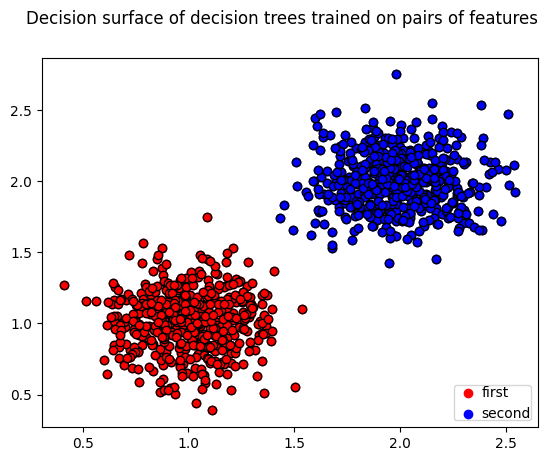

In [4]:

Theta_j = one_layer_init(2,1)
for _ in range(3000):
    Theta_j=weight_update(
    A_j=forward_prop(data,Theta_j)[0],
    Delta_next=output_delta(forward_prop(data,Theta_j)[1], labels),
    Theta_j=Theta_j,
    rate=0.9         
    )



idx0 = np.where(forward_prop(data,Theta_j)[1] <= 0.5)
idx1 = np.where(forward_prop(data,Theta_j)[1] > 0.5)

plt.scatter(data[:amount,0] ,data[:amount,1],color="r",label="first")


plt.scatter(data[amount:,0] ,data[amount:,1],color="b",label="second",)
plt.legend()


plt.scatter(data[idx0,0],data[idx0,1],color="r",          
            edgecolor="black")
plt.scatter(data[idx1,0],data[idx1,1],color="b",      
            edgecolor="black")


plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)


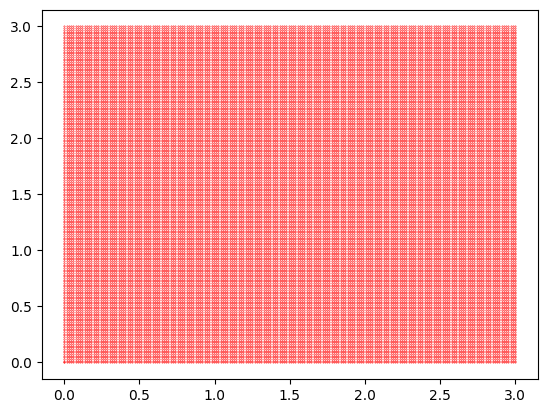

In [5]:
number_of_datapoints = 200
line = np.vstack(np.linspace(0,3,number_of_datapoints))
fakedata = np.array([[0,0]])
for datapoint in line:
    
    fakedata=np.vstack((fakedata,np.hstack((line,np.vstack(np.linspace(datapoint,datapoint,number_of_datapoints))))))

plt.scatter(fakedata[:,0],fakedata[:,1],color="r",s=0.1)




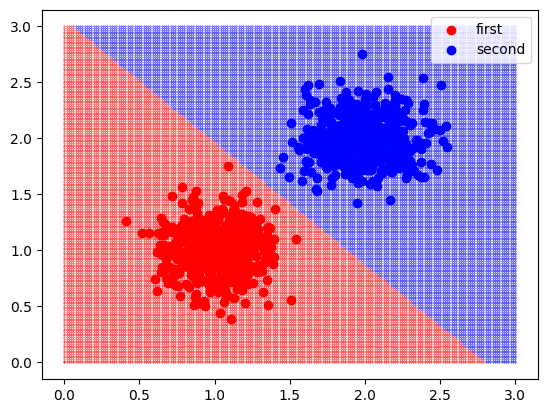

In [6]:
idx0 = np.where(forward_prop(fakedata,Theta_j)[1] <= 0.5)
idx1 = np.where(forward_prop(fakedata,Theta_j)[1] > 0.5)


plt.scatter(data[:amount,0] ,data[:amount,1],color="r",label="first")


plt.scatter(data[amount:,0] ,data[amount:,1],color="b",label="second",)
plt.legend()

plt.scatter(fakedata[idx0,0],fakedata[idx0,1],color="r",s=0.1)
plt.scatter(fakedata[idx1,0],fakedata[idx1,1],color="b",s=0.1)

